In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cric = pd.read_csv("matches.csv")
cric.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [4]:
print("Matches played :", cric.shape[0])

Matches played : 696


In [5]:
print("No. of seasons :",len(cric['season'].unique()))

No. of seasons : 11


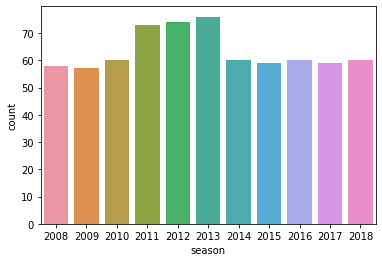

In [6]:
#no. of matches per season

sns.countplot(x = 'season' , data = cric)
plt.show()

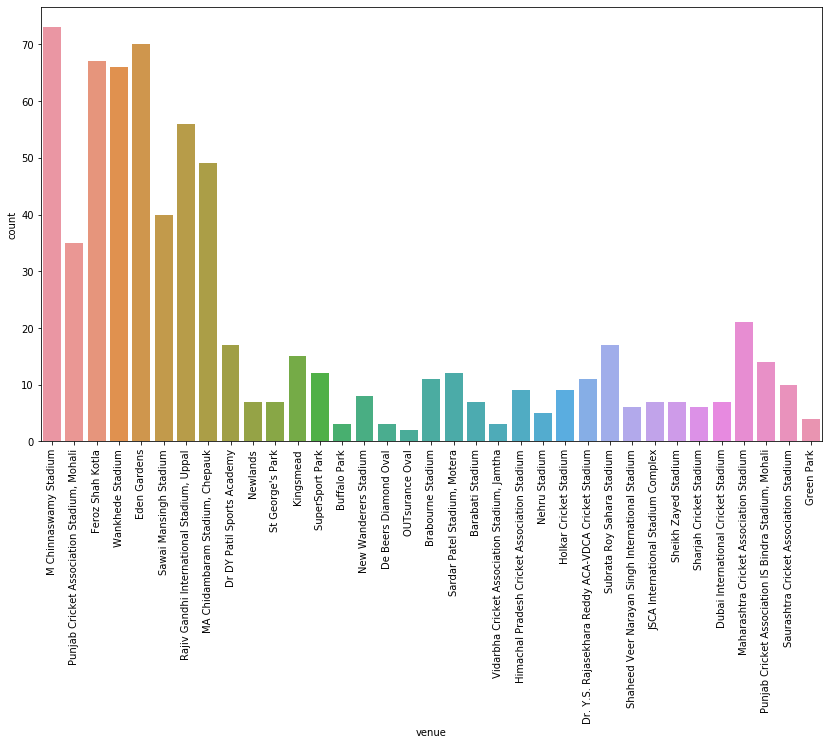

In [10]:
#No. of matches in per venue:

plt.figure(figsize=(14,8))
sns.countplot(x='venue', data= cric)
plt.xticks(rotation='vertical')
plt.show()

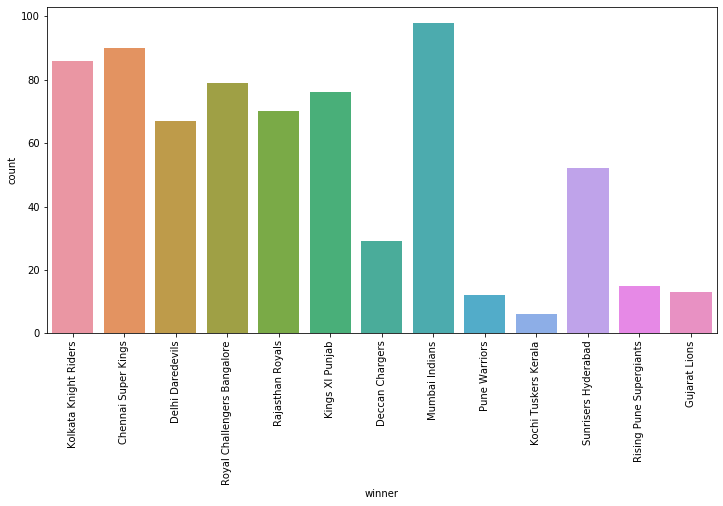

In [11]:
#No. of wins per team:

plt.figure(figsize=(12,6))
sns.countplot(x='winner', data= cric)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
#Champions in every season:

champ_s = cric.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
champ_s

,season,winner,result
0,2008,Rajasthan Royals,normal
1,2009,Deccan Chargers,normal
2,2010,Chennai Super Kings,normal
3,2011,Chennai Super Kings,normal
4,2012,Kolkata Knight Riders,normal
5,2013,Mumbai Indians,normal
6,2014,Kolkata Knight Riders,normal
7,2015,Mumbai Indians,normal
8,2016,Sunrisers Hyderabad,normal
9,2017,Mumbai Indians,normal


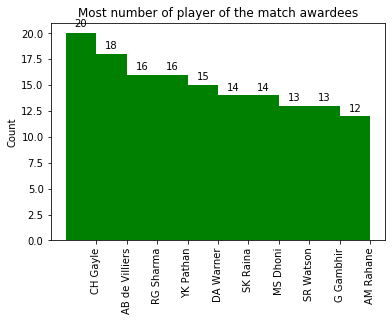

In [17]:
#Creating a function for labeling


def autolabel(param):
    for item in param:
        height = item.get_height()
        ax.text(item.get_x() + item.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')
#Top players of the match:

data_series = cric.player_of_match.value_counts()[:10]
labels = np.array(data_series.index)
ind = np.arange(len(labels))
width = 1
fig, ax = plt.subplots()
param = ax.bar(ind, np.array(data_series), width = width, color='g')
ax.set_xticks(ind+((width)/2.0))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Most number of player of the match awardees")
autolabel(param)
plt.show()

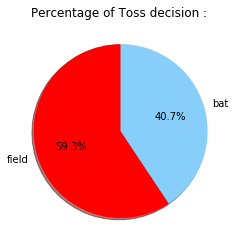

In [19]:
#Toss decision:

data_series = cric.toss_decision.value_counts()
labels = (np.array(data_series.index))
sizes = (np.array((data_series / data_series.sum())*100))
colors = ['red', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage of Toss decision : ")
plt.show()


# Almost 59% of the toss decisions are made to field first. 


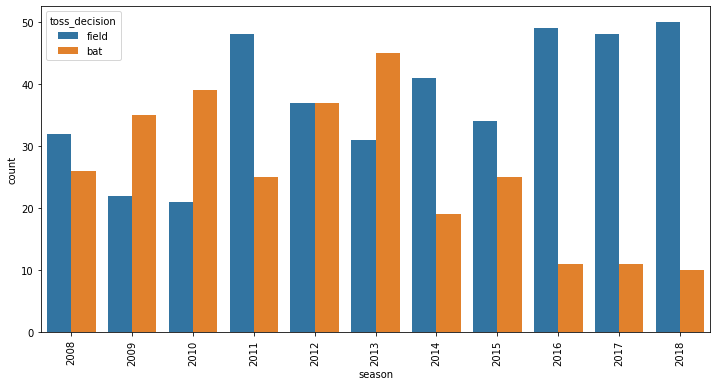

In [20]:
#decision varied over time.
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data= cric)
plt.xticks(rotation='vertical')
plt.show() ##  there is a very strong trend towards fielding.

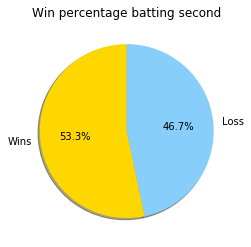

In [21]:
#Win percentage of teams batting second

num_of_wins = (cric.win_by_wickets>0).sum()
num_of_loss = (cric.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show() # So percentage of times teams batting second has won is 53.3%


C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


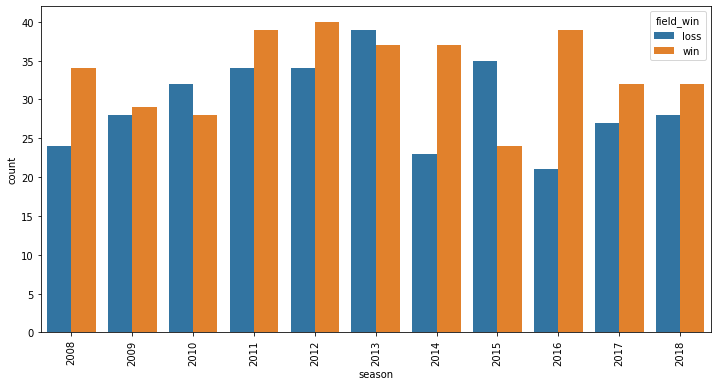

In [22]:
#splitting this by year

cric["field_win"] = "win"
cric["field_win"].loc[cric['win_by_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data= cric)
plt.xticks(rotation='vertical')
plt.show()                             # Number of wins batting second is also quite high

In [23]:
cric[pd.isnull(cric['winner'])]

#finding all NaN values in winner column, so that it can be updated as draw

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,field_win
241,242,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN,loss
486,487,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN,loss
511,512,2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN,loss


In [25]:
cric['winner'].fillna('Draw', inplace=True)

In [26]:
cric.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
cric.replace(encode, inplace=True)
cric.head(2)
#replacing long team names with numbers 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,field_win
0,1,2008,Bangalore,18-04-2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,loss
1,2,2008,Chandigarh,19-04-2008,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,loss


In [27]:
#Cities that are null

cric[pd.isnull(cric['city'])]
print(cric['city'])

0       Bangalore
1      Chandigarh
2           Delhi
3          Mumbai
4         Kolkata
          ...    
691          Pune
692        Mumbai
693       Kolkata
694       Kolkata
695        Mumbai
Name: city, Length: 696, dtype: object


In [30]:
#removing any null values winner has hence, fill the null value in winner as draw
#City is also null, this is mainly for Dubai stadium. Hence updating the City as UAE
#Make sure to impute the data that is cleansing and finding missing data, there is also other process 
#to verify expected value based on other resultants, for now by stadium, city is easily manually updated

cric['city'].fillna('UAE',inplace=True)
cric.describe()
cric.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
field_win            0
dtype: int64

In [31]:
# maintaining a dictionary for future reference mapping teams

dict_val = encode['winner']
print(dict_val['MI']) #key value
print(list(dict_val.keys())[list(dict_val.values()).index(1)]) #find key by value search 

1
MI


In [32]:
print(dict_val['KKR']) 

2


In [33]:
print(list(dict_val.keys())[list(dict_val.values()).index(8)])

GL


In [34]:
cric = cric[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
cric.head(12)
c=cric['city']

In [69]:
cric.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,7,0,5,22,5
2,6,7,10,0,6,8,7
3,1,3,23,0,1,34,3
4,4,2,21,0,4,7,2
5,9,6,16,0,9,26,6
6,4,7,14,0,4,23,7
7,5,1,8,1,1,15,5
8,4,6,14,1,6,23,6
9,9,1,7,1,1,22,9


In [35]:
datafram = pd.DataFrame(cric)
a = datafram['city']
b = dict(a)
b

{0: 'Bangalore',
 1: 'Chandigarh',
 2: 'Delhi',
 3: 'Mumbai',
 4: 'Kolkata',
 5: 'Jaipur',
 6: 'Hyderabad',
 7: 'Chennai',
 8: 'Hyderabad',
 9: 'Chandigarh',
 10: 'Bangalore',
 11: 'Chennai',
 12: 'Mumbai',
 13: 'Chandigarh',
 14: 'Bangalore',
 15: 'Kolkata',
 16: 'Delhi',
 17: 'Hyderabad',
 18: 'Jaipur',
 19: 'Chennai',
 20: 'Hyderabad',
 21: 'Chandigarh',
 22: 'Mumbai',
 23: 'Jaipur',
 24: 'Bangalore',
 25: 'Chennai',
 26: 'Mumbai',
 27: 'Delhi',
 28: 'Kolkata',
 29: 'Jaipur',
 30: 'Bangalore',
 31: 'Chennai',
 32: 'Hyderabad',
 33: 'Jaipur',
 34: 'Chandigarh',
 35: 'Kolkata',
 36: 'Mumbai',
 37: 'Chandigarh',
 38: 'Delhi',
 39: 'Mumbai',
 40: 'Delhi',
 41: 'Jaipur',
 42: 'Hyderabad',
 43: 'Kolkata',
 44: 'Bangalore',
 45: 'Kolkata',
 46: 'Mumbai',
 47: 'Chennai',
 48: 'Chandigarh',
 49: 'Delhi',
 50: 'Chennai',
 51: 'Bangalore',
 52: 'Kolkata',
 53: 'Jaipur',
 54: 'Hyderabad',
 55: 'Mumbai',
 56: 'Mumbai',
 57: 'Mumbai',
 58: 'Cape Town',
 59: 'Cape Town',
 60: 'Cape Town',
 61: 'Ca

In [36]:
# stats on the match winners and toss winners


temp1=datafram['toss_winner'].value_counts(sort=True)
temp2=datafram['winner'].value_counts(sort=True)

#Mumbai won most no. of tosses and also most no. of matches

print('No. of toss winners by each team:')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dict_val.keys())[list(dict_val.values()).index(idx)],val))
print('No. of match winners by each team:')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dict_val.keys())[list(dict_val.values()).index(idx)],val))


No. of toss winners by each team:
MI -> 90
KKR -> 87
DD -> 80
CSK -> 77
RCB -> 77
KXIP -> 75
RR -> 69
DC -> 43
SRH -> 42
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No. of match winners by each team:
MI -> 98
CSK -> 90
KKR -> 86
RCB -> 79
KXIP -> 76
RR -> 70
DD -> 67
SRH -> 52
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


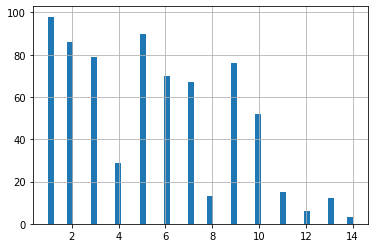

In [37]:
# Mumbai won most matches followed by Chennai

datafram['winner'].hist(bins=50)

Text(0.5, 1.0, 'Probability of match winning by winning toss')

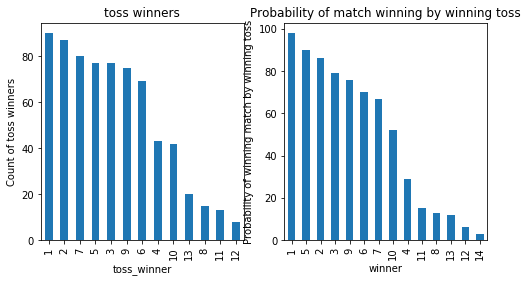

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Probability of winning match by winning toss')
ax2.set_title("Probability of match winning by winning toss")


In [39]:
datafram.apply(lambda x: sum(x.isnull()),axis=0) 

#finding the null values in every column


team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [40]:
#Find cities which are null
datafram[pd.isnull(datafram['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [41]:
#building predictive model

from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for o in var_mod:
    datafram[o] = le.fit_transform(datafram[o])
datafram.dtypes 

team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

In [62]:
#Import models from scikit learn module:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold                       #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # for comparing results from different classifiers
from sklearn import metrics

# function for making a classification model and accessing performance:

def classif_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data[predictors]):
    train_predictors = (data[predictors].iloc[train,:])
    
    train_target = data[outcome].iloc[train]
    
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome]) 


In [50]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner','venue','toss_decision','city']
model = LogisticRegression()
classif_model(model, datafram ,predictor_var,outcome_var) #hence logistic regression is not best suit for such kinds of data

C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  F

Accuracy : 31.178%
Cross-Validation Score : 28.455%


C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [49]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classif_model(model, datafram ,predictor_var,outcome_var)


C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Accuracy : 87.931%


C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users

Cross-Validation Score : 48.416%


C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [58]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dict_val[team1],dict_val[team2],14,dict_val[toss_winner],'2','1']
input = np.array(input,dtype = 'int64').reshape((1, -1))
output= model.predict(input)
print(list(dict_val.keys())[list(dict_val.values()).index(output)]) #find key by value search output


RCB


In [64]:

imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
imp_input
# need to look into this again

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

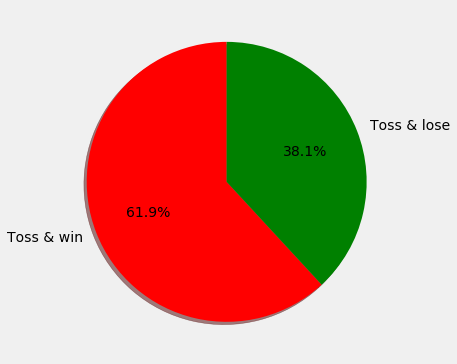

In [66]:
#okay from the above prediction on features, we notice toss winner has 
#least chances of winning matches
#but does the current stats shows the same result
#datafram.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
datafram_fil=datafram[datafram['toss_winner']==datafram['winner']]
slices=[len(datafram_fil),(577-len(datafram_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 

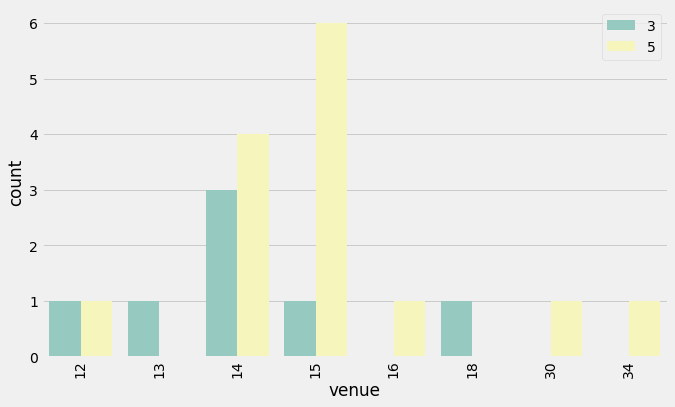

In [67]:
#top 2 team analysis based on number of matches won against each other and how venue affects them?
#Previously we noticed that CSK won 79, RCB won 70 matches
#now let us compare venue against a match between CSK and RCB
#we find that CSK has won most matches against RCB in MA Chidambaram Stadium, Chepauk, Chennai
#RCB has not won any match with CSK in stadiums St George's Park and Wankhede Stadium, but won matches
#with CSK in Kingsmead, New Wanderers Stadium.
#It does prove that chances of CSK winning is more in Chepauk stadium when played against RCB.
# Proves venue is important feature in predictability
import seaborn as sns
team1=dict_val['CSK']
team2=dict_val['RCB']
mtemp= cric[((cric['team1']==team1)|(cric['team2']==team1))&((cric['team1']==team2)|(cric['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set3')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
#mlt.show()
#le.classes_[18] to get stadium details


In [72]:
def predict(arr):
  return model.predict(arr)
